(206,)


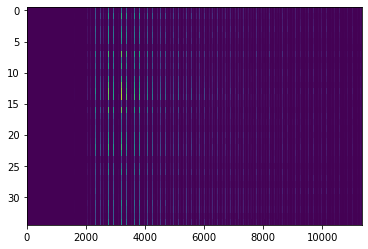


(30, 11330)
(30,)
{'copy': True, 'max_iter': 10000, 'n_components': 6, 'scale': True, 'tol': 1e-06}
Правильность на тестовом наборе: 0.72


In [20]:
from gzip import open # NB: overrides standard open()
import pickle as pkl
import tensorly as tl
from tensorly.base import tensor_to_vec,  partial_tensor_to_vec
import numpy as np
import pandas as pd
import warnings 
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

warnings.simplefilter('ignore') # отключим предупреждения Anaconda
Xdata_numpy = pkl.load(open('C:/Users/admin/Desktop/88/X.pkl.gz', 'rb'))
Ydata = pkl.load(open('C:/Users/admin/Desktop/88/y.pkl.gz', 'rb'))
print(Xdata_numpy['emission'].shape)
string_name=[]
string_name2=[]
k=0
#создаю пространство имён для развёрнутого тензора
for i in range(len(Xdata_numpy['emission'])):
    for j in range(len(Xdata_numpy['excitation'])):
        string_name+=[str(Xdata_numpy['emission'][i])+" x "+str(Xdata_numpy['excitation'][j])]
        string_name2+=[k]
        k+=1
#создаём пространство образцов
examples_names=[]
v=[]
for i in range(0,35):
    examples_names+=[str(i)]
    v+=[i]
Xdata_numpy['X'].shape = (Xdata_numpy['X'].shape[0], Xdata_numpy['X'].shape[1] * Xdata_numpy['X'].shape[2])
Xdata_numpy['X'][:,np.isnan(Xdata_numpy['X']).any(axis = 0)] = 0 # zero out any columns containing NaN

#рисуем новую матрицу
import matplotlib.pyplot as plt
plt.imshow(Xdata_numpy['X'],aspect="auto")
plt.show();
print()

X=pd.DataFrame(Xdata_numpy['X'],index=examples_names, columns=string_name)
#делим набор на обучающий и тестовый
X_train, X_test, y_train, y_test = train_test_split(
     X, Ydata.iloc[:,0], test_size=0.1428 
)
print(X_train.shape)
print(y_train.shape)
s=[]

#начинаем применять
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import GridSearchCV


pls1 = PLSRegression()
parametrsNames={
    'copy': [True], 
    'max_iter': [10000], 
    'n_components': range(1,15), 
    'scale': [True], 
    'tol': [1e-06]
}
gridCought=GridSearchCV(pls1, parametrsNames, cv=5)
gridCought.fit(X_train,y_train)
predictors=gridCought.predict(X_test)



print(gridCought.best_params_)
print("Правильность на тестовом наборе: {:.2f}".format(gridCought.score(X_test, y_test)))



In [21]:
print(predictors.shape)

(5, 1)


In [22]:
print("Правильность на тестовом наборе: {:.2f}".format(gridCought.score(X_test, y_test)))

Правильность на тестовом наборе: 0.72


In [23]:
print("Наилучшее значение кросс-валидац. правильности: {:.2f}".format(gridCought.best_score_))

Наилучшее значение кросс-валидац. правильности: 0.70


In [24]:
from  sklearn.metrics import  mean_squared_error
final_mse = mean_squared_error (y_test,  predictors) 
final_rmse  =  np.sqrt(final_mse)  
print(final_rmse)

3.7818883077619985


In [25]:
from  sklearn.metrics import accuracy_score
print(gridCought.accuracy_score(y_test,  predictors))

AttributeError: 'GridSearchCV' object has no attribute 'accuracy_score'

In [26]:
print(predictors)
print(y_test)

[[29.96470984]
 [31.00034767]
 [30.41496406]
 [43.62345239]
 [45.91346139]]
27    28.183879
21    33.342049
5     36.479939
31    39.901821
15    49.409746
Name: Gominy, dtype: float64


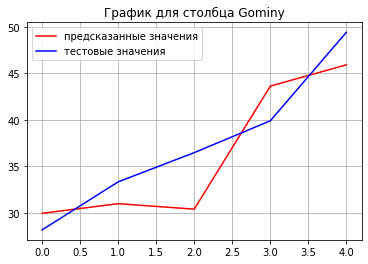

In [27]:
b=[]
for  i in range(0,5):
    b+=[i]
plt.plot(b,predictors,color="red",label="предсказанные значения")
plt.plot(b,y_test,color="blue", label="тестовые значения")
plt.legend()
plt.grid(True)
plt.title("График для столбца Gominy")
plt.show();